# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [75]:
#Type your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [76]:
# Load data
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [77]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [78]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [79]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

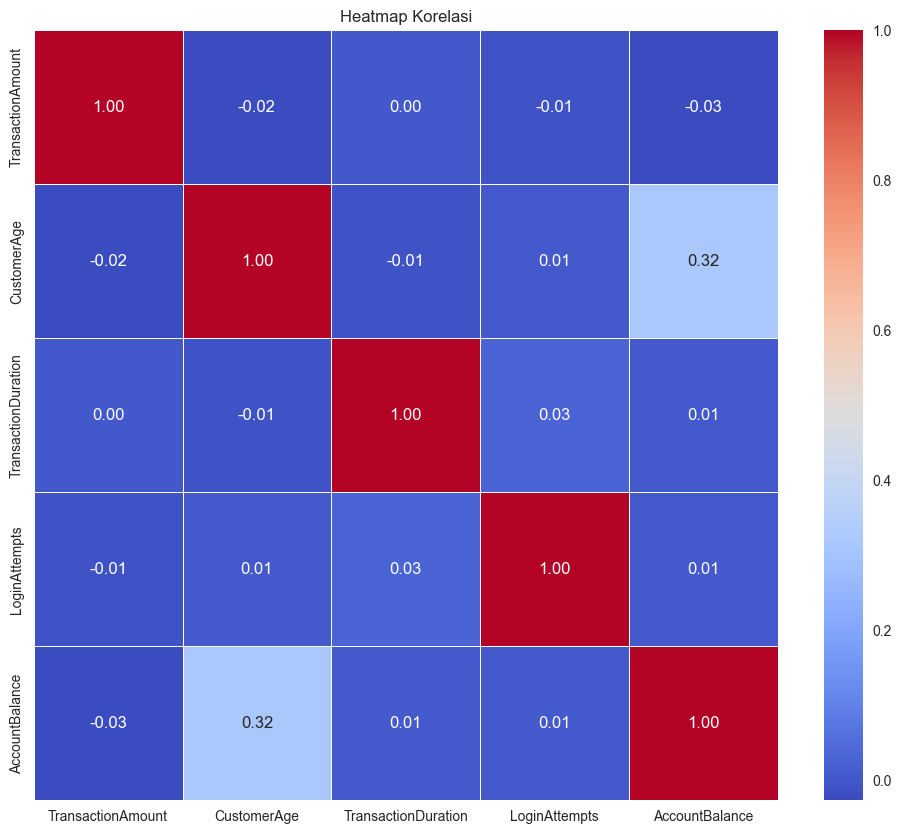

In [80]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
num_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

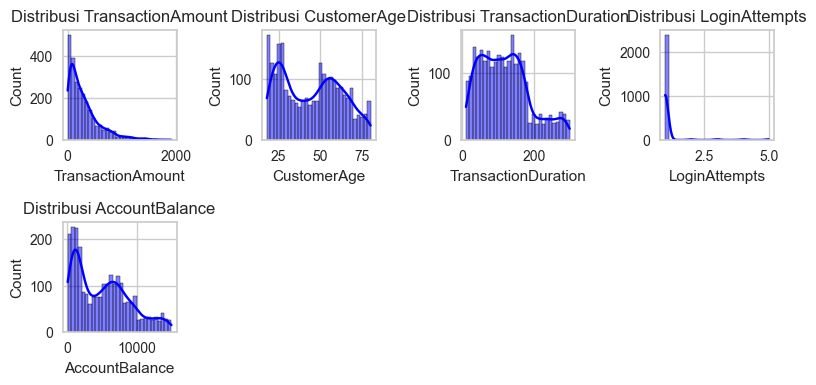

In [81]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(num_features[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

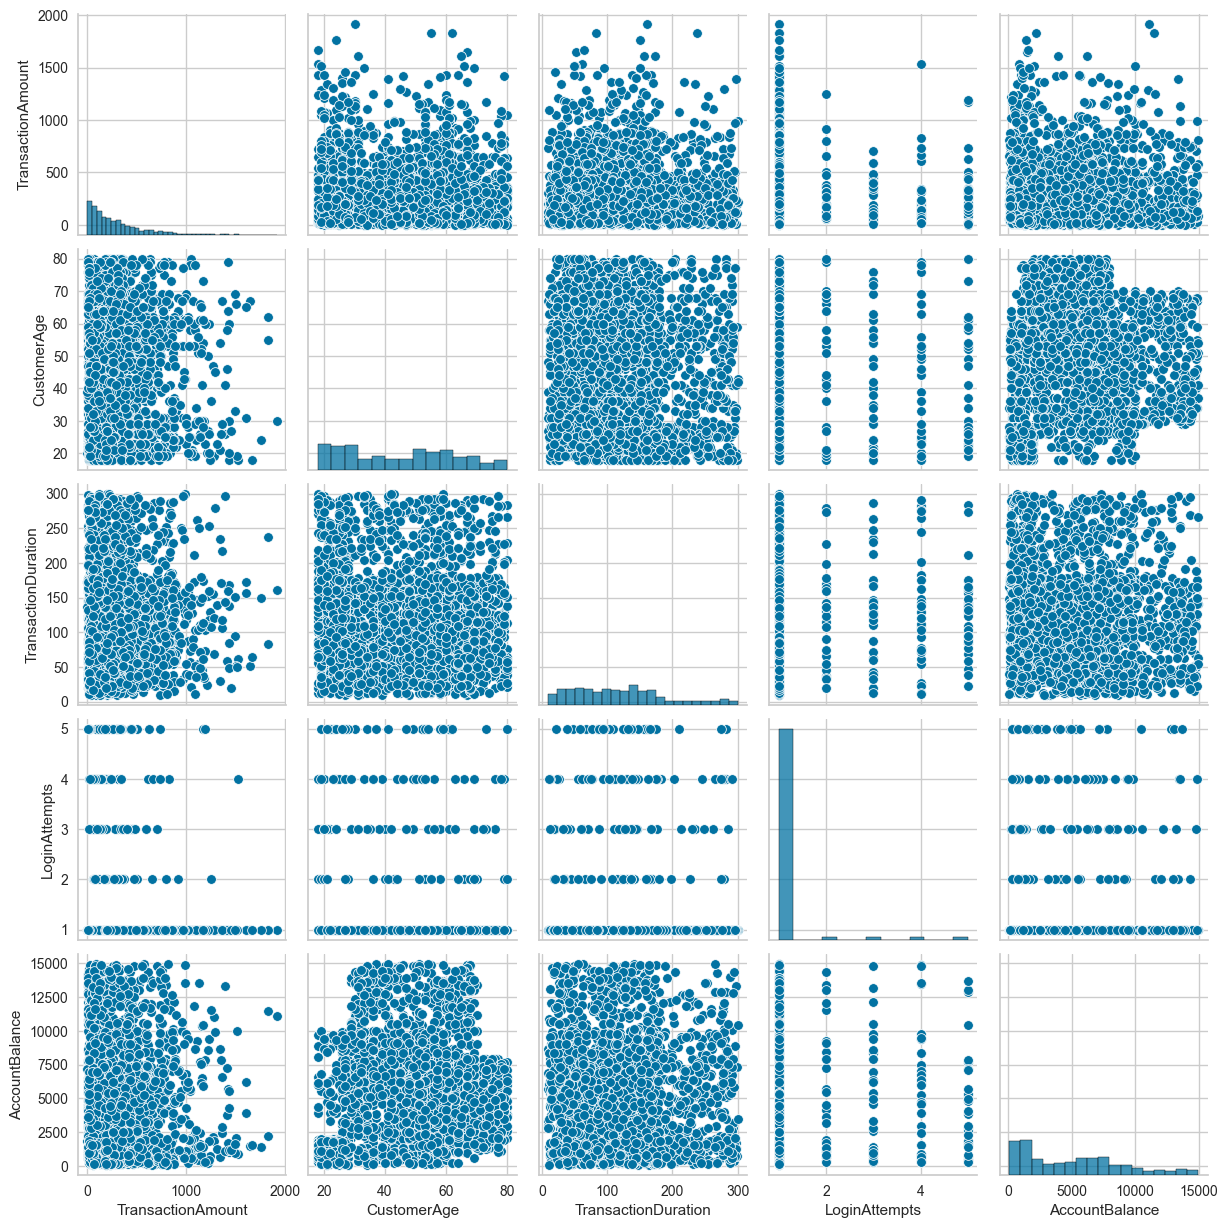

In [82]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
sns.pairplot(num_features)
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [83]:
# Mengecek dataset menggunakan isnull().sum()
print('\nMissing values: ')
df.isnull().sum()


Missing values: 


TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64

In [84]:
# Mengecek dataset menggunakan duplicated().sum()
print('\nDuplicate rows: ')
df.duplicated().sum()


Duplicate rows: 


np.int64(21)

In [85]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
scaler = StandardScaler()
df_scaled = df.copy()

# Melakukan transformasi log pada fitur LoginAttempts
df_scaled['LoginAttempts'] = np.log1p(df['LoginAttempts'])

# Mengubah kolom TransactionDate dan PreviousTransactionDate menjadi tipe datetime kemudian ekstrak menjadi kolom DaysSinceLastTransaction
df_scaled['TransactionDate'] = pd.to_datetime(df_scaled['TransactionDate'])
df_scaled['PreviousTransactionDate'] = pd.to_datetime(df_scaled['PreviousTransactionDate'])
df_scaled['DaysSinceLastTransaction'] = (df_scaled['PreviousTransactionDate'] - df_scaled['TransactionDate']).dt.days
df_scaled = df_scaled.drop(columns=['TransactionDate', 'PreviousTransactionDate'])

num_features = df_scaled.select_dtypes(include=[np.number])
df_scaled[num_features.columns] = scaler.fit_transform(num_features)
df_scaled.head()

,TransactionID,AccountID,TransactionAmount,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,DaysSinceLastTransaction
0,TX000001,AC00128,-0.970546,Debit,San Diego,D000380,162.198.218.92,M015,ATM,1.419862,Doctor,-0.548393,-0.212591,-0.000315,0.795216
1,TX000002,AC00455,0.268963,Debit,Houston,D000051,13.149.61.4,M052,ATM,1.307715,Doctor,0.307960,-0.212591,2.218381,0.072747
2,TX000003,AC00019,-0.586526,Debit,Mesa,D000235,215.97.143.157,M009,Online,-1.439874,Student,-0.905207,-0.212591,-1.024091,-0.049228
3,TX000004,AC00070,-0.387294,Debit,Raleigh,D000187,200.13.225.150,M002,Online,-1.047361,Student,-1.347656,-0.212591,0.886694,0.570031
4,TX000005,AC00411,-0.972736,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,1.121495,-0.212591,0.594263,-0.968734


In [86]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df_scaled = df_scaled.drop(columns=['TransactionID', 'AccountID', 'IP Address', 'DeviceID', 'MerchantID'])
df_scaled.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,DaysSinceLastTransaction
0,-0.970546,Debit,San Diego,ATM,1.419862,Doctor,-0.548393,-0.212591,-0.000315,0.795216
1,0.268963,Debit,Houston,ATM,1.307715,Doctor,0.307960,-0.212591,2.218381,0.072747
2,-0.586526,Debit,Mesa,Online,-1.439874,Student,-0.905207,-0.212591,-1.024091,-0.049228
3,-0.387294,Debit,Raleigh,Online,-1.047361,Student,-1.347656,-0.212591,0.886694,0.570031
4,-0.972736,Credit,Atlanta,Online,NaN,Student,1.121495,-0.212591,0.594263,-0.968734


In [87]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
category_features = df_scaled.select_dtypes(include=['object']).columns
encoders = {}

for col in category_features:
    label_encoder = LabelEncoder()
    df_scaled[col] = label_encoder.fit_transform(df_scaled[col])
    encoders[col] = label_encoder

df_scaled.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,DaysSinceLastTransaction
0,-0.970546,1,36,0,1.419862,0,-0.548393,-0.212591,-0.000315,0.795216
1,0.268963,1,15,0,1.307715,0,0.307960,-0.212591,2.218381,0.072747
2,-0.586526,1,23,2,-1.439874,3,-0.905207,-0.212591,-1.024091,-0.049228
3,-0.387294,1,33,2,-1.047361,3,-1.347656,-0.212591,0.886694,0.570031
4,-0.972736,0,1,2,NaN,3,1.121495,-0.212591,0.594263,-0.968734


In [88]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df_scaled.columns.tolist()

['TransactionAmount',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'DaysSinceLastTransaction']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [89]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
# menggunakan fillna pada kolom numerik dengan median
df_scaled[num_features.columns] = df_scaled[num_features.columns].fillna(df_scaled[num_features.columns].median())

#drop loginattempts from num_features


# menggunakan fillna pada kolom kategorikal dengan modus
for col in category_features:
    df_scaled[col] = df_scaled[col].fillna(df_scaled[col].mode()[0])

df_scaled.isnull().sum()

TransactionAmount           0
TransactionType             0
Location                    0
Channel                     0
CustomerAge                 0
CustomerOccupation          0
TransactionDuration         0
LoginAttempts               0
AccountBalance              0
DaysSinceLastTransaction    0
dtype: int64

In [90]:
# Menghapus data duplikat menggunakan drop_duplicates().
df_scaled = df_scaled.drop_duplicates()
df_scaled.duplicated().sum()

np.int64(0)

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

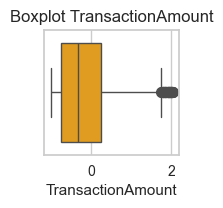

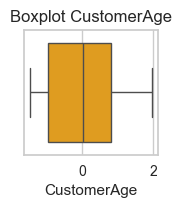

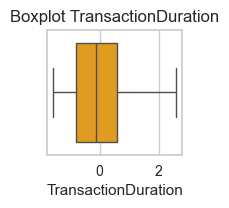

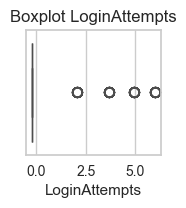

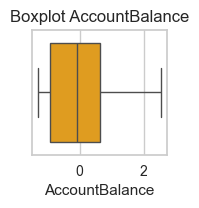

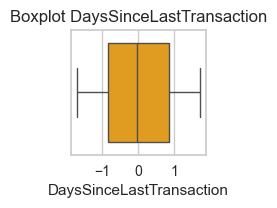

In [91]:
# Tidak menyertakan kolom LoginAttempts dalam penanganan outlier
cols_for_outlier_handling = [col for col in num_features.columns if col != 'LoginAttempts']

# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
Q1 = df_scaled[cols_for_outlier_handling].quantile(0.25)
Q3 = df_scaled[cols_for_outlier_handling].quantile(0.75)
IQR = Q3 - Q1

# filter data yang bukan outlier
condition = ~((df_scaled[cols_for_outlier_handling] < (Q1 - 1.5 * IQR)) | (df_scaled[cols_for_outlier_handling] > (Q3 + 1.5 * IQR))).any(axis=1)
df_scaled = df_scaled[condition].copy()

# Melakukan visualisasi ulang untuk memastikan outlier telah ditangani.
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df_scaled[column], color='orange')
    plt.title(f'Boxplot {column}')
    plt.show()

In [92]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.

# copy raw df sebelum binning
df_raw = df.copy()

# Melakukan binning pada fitur 'CustomerAge'
age_bins = [17, 30, 55, 81]
age_bins_labels = ['Dewasa Muda', 'Dewasa', 'Lansia']
age_binned = pd.cut(df_raw['CustomerAge'], bins=age_bins, labels=age_bins_labels, right=True)

# Melakukan binning pada fitur 'TransactionAmount'
transaction_amount_bins = [0, 100, 500, 1000, 2000]
transaction_amount_labels = ['Kecil', 'Sedang', 'Besar', 'Sangat Besar']
transaction_amount_binned = pd.cut(df_raw['TransactionAmount'], bins=transaction_amount_bins, labels=transaction_amount_labels, right=True)

# Menggabungkan hasil binning ke dalam dataframe asli
df_scaled['AgeGroup'] = age_binned
df_scaled['TransactionAmountGroup'] = transaction_amount_binned

# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.
age_label_encoder = LabelEncoder()
transaction_amount_label_encoder = LabelEncoder()
df_scaled['AgeGroup'] = age_label_encoder.fit_transform(df_scaled['AgeGroup'])
df_scaled['TransactionAmountGroup'] = transaction_amount_label_encoder.fit_transform(df_scaled['TransactionAmountGroup'])

# # Tampilkan 5 baris pertama dengan function head.
df_scaled.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,DaysSinceLastTransaction,AgeGroup,TransactionAmountGroup
0,-0.970546,1,36,0,1.419862,0,-0.548393,-0.212591,-0.000315,0.795216,2,1
1,0.268963,1,15,0,1.307715,0,0.307960,-0.212591,2.218381,0.072747,2,2
2,-0.586526,1,23,2,-1.439874,3,-0.905207,-0.212591,-1.024091,-0.049228,1,2
3,-0.387294,1,33,2,-1.047361,3,-1.347656,-0.212591,0.886694,0.570031,1,2
4,-0.972736,0,1,2,0.018031,3,1.121495,-0.212591,0.594263,-0.968734,3,1


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [93]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df_clustering = df_scaled.copy()
df_clustering.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,DaysSinceLastTransaction,AgeGroup,TransactionAmountGroup
count,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,-0.147321,0.786756,21.279050,1.010829,-0.000769,1.528113,-0.000122,0.000970,0.005806,0.007506,0.972928,1.421491
std,0.738360,0.439137,12.383373,0.828583,0.992403,1.150426,0.995691,1.001332,0.995094,0.988693,0.841437,0.743710
min,-1.017881,0.000000,0.000000,0.000000,-1.495947,0.000000,-1.561745,-0.212591,-1.286100,-1.691204,0.000000,0.000000
25%,-0.748656,1.000000,11.000000,0.000000,-0.991288,0.000000,-0.805299,-0.212591,-0.919796,-0.846759,0.000000,1.000000
50%,-0.334791,1.000000,21.000000,1.000000,0.018031,2.000000,-0.105944,-0.212591,-0.097334,-0.021080,1.000000,2.000000
75%,0.252637,1.000000,32.000000,2.000000,0.803056,3.000000,0.593411,-0.212591,0.648879,0.870278,2.000000,2.000000
max,2.050618,2.000000,43.000000,3.000000,1.980594,4.000000,2.577295,5.979643,2.531190,1.724106,3.000000,3.000000


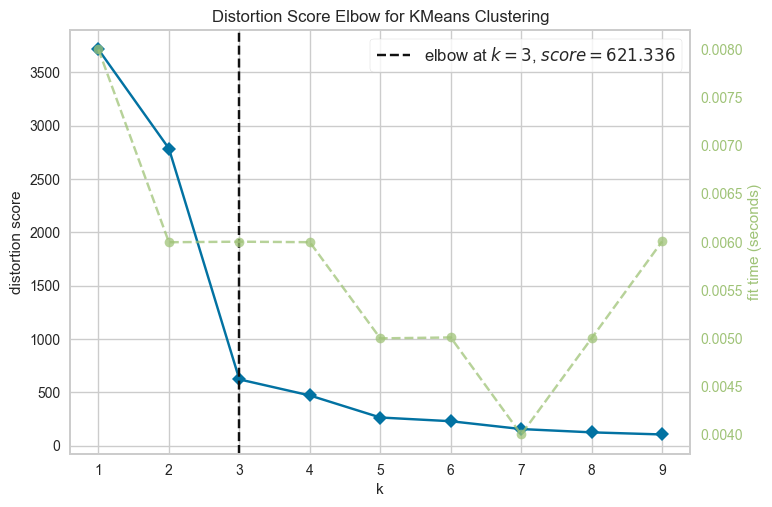

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [94]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Mengambil kolom AgeGroup, LoginAttempt, dan TransactionAmountGroup untuk visualisasi
X = df_clustering.iloc[:, [0, 7]].values
visualizer.fit(X)
visualizer.show()

In [95]:
# Menggunakan algoritma K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

print("Centroids:\n", kmeans.cluster_centers_)

Centroids:
 [[-0.52999053 -0.18935479]
 [-0.19802867  4.84991346]
 [ 0.86110779 -0.18397937]]


Jalankan cell code ini untuk menyimpan model kamu.

In [96]:
# Menyimpan model menggunakan joblib
import joblib
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [97]:
# Menghitung dan menampilkan nilai Silhouette Score.
silhouette_avg = silhouette_score(X, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.6280727245818469


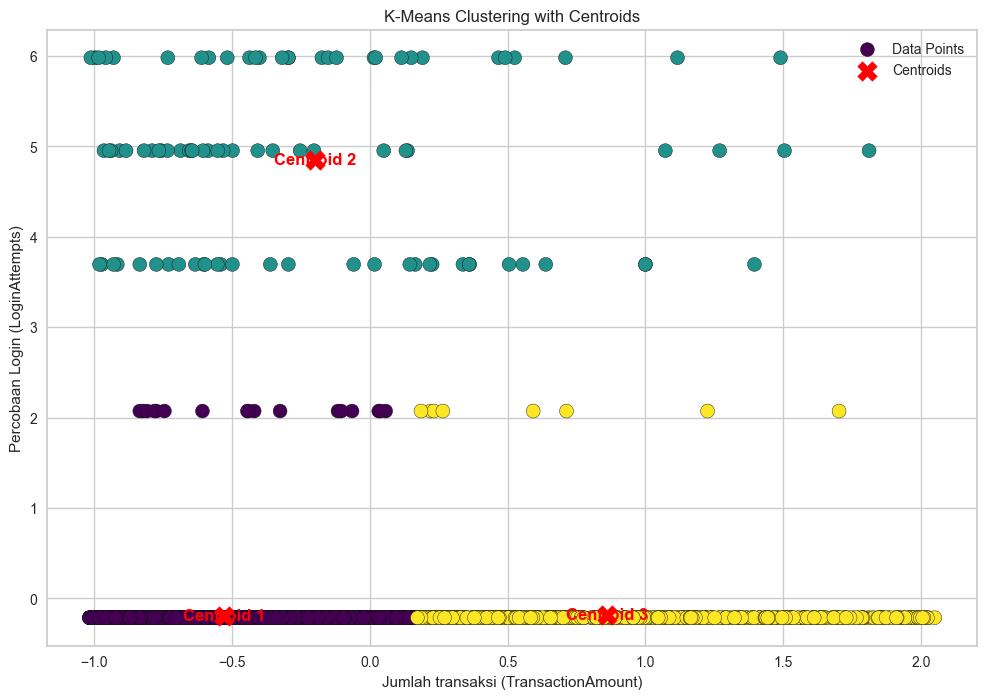

Nilai centroids:
Centroid 1: [-0.52999053 -0.18935479]
Centroid 2: [-0.19802867  4.84991346]
Centroid 3: [ 0.86110779 -0.18397937]


In [98]:
# Membuat visualisasi hasil clustering
centroids = kmeans.cluster_centers_
plt.figure(figsize=(12, 8))

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', edgecolor='k', s=100, label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', fontsize=12, ha='center', va='center', color='red', weight='bold')

plt.title('K-Means Clustering with Centroids')
plt.xlabel('Jumlah transaksi (TransactionAmount)')
plt.ylabel('Percobaan Login (LoginAttempts)')
plt.legend()
plt.show()

print("Nilai centroids:")
for i, centroid in enumerate(centroids):
    print(f'Centroid {i+1}: {centroid}')

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [99]:
# Membangun model menggunakan PCA.
pca =PCA(n_components=2)
data_pca = pca.fit_transform(X)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
data_pca = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
kmeans_pca = KMeans(n_clusters=3)
kmeans_pca.fit(data_pca)

KMeans(n_clusters=3)

In [100]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
joblib.dump(kmeans_pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [101]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
df_clustering['Target'] = kmeans.labels_
df_result = df_clustering.copy()
aggregation_functions = {
    'TransactionAmount': ['mean', 'min', 'max'],
    'LoginAttempts': ['mean', 'min', 'max']
}
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
grouped_clustering_df = df_result.groupby('Target').agg(aggregation_functions)
print("\nHasil Analisis Deskriptif (Scaled Data):")
print(grouped_clustering_df)


Hasil Analisis Deskriptif (Scaled Data):
       TransactionAmount                     LoginAttempts                    
                    mean       min       max          mean       min       max
Target                                                                        
0              -0.532503 -1.017881  0.165257     -0.189271 -0.212591  2.072778
1              -0.198029 -1.012165  1.812231      4.849913  3.694273  5.979643
2               0.854657  0.165839  2.050618     -0.184246 -0.212591  2.072778


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1: (Nasabah Berisiko Tinggi / Aktivitas Mencurigakan)**:
  - **Rata-rata (mean) TransactionAmount:** -0.198029
  - **Rata-rata (mean) LoginAttempts:** 4.849913
  - **Analisis:** Ciri utama cluster ini adalah nilai LoginAttempts yang sangat ekstrem, yaitu hampir 5 standar deviasi di atas rata-rata normal. Ini adalah anomali statistik yang sangat signifikan dan merupakan sinyal bahaya. Rata-rata nilai transaksinya tidak terlalu menonjol, tetapi pola loginnya sangat mencurigakan.

  2. **Cluster 2: (Nasabah Bernilai Tinggi)**:
  - **Rata-rata (mean) TransactionAmount:** 0.854657
  - **Rata-rata (mean) LoginAttempts:** -0.184246
  - **Analisis:** Cluster ini menonjol karena nilai TransactionAmount-nya yang berada hampir 1 standar deviasi di atas rata-rata. Ini menandakan kelompok dengan nilai transaksi yang besar. Di sisi lain, rata-rata LoginAttempts-nya sangat normal (mendekati 0), menunjukkan tidak ada perilaku mencurigakan.

  3. **Cluster 0: (Nasabah Reguler Transaksi Rendah)**:
  - **Rata-rata (mean) TransactionAmount:** -0.532503
  - **Rata-rata (mean) LoginAttempts:** -0.189271
  - **Analisis:** Cluster ini memiliki rata-rata TransactionAmount yang berada setengah standar deviasi di bawah rata-rata keseluruhan, menandakan kelompok dengan nilai transaksi yang cenderung kecil. Perilaku login mereka juga sangat normal. Mereka adalah representasi dari nasabah biasa dengan transaksi harian bernilai rendah.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [102]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df_clustering.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,DaysSinceLastTransaction,AgeGroup,TransactionAmountGroup,Target
0,-0.970546,1,36,0,1.419862,0,-0.548393,-0.212591,-0.000315,0.795216,2,1,0
1,0.268963,1,15,0,1.307715,0,0.307960,-0.212591,2.218381,0.072747,2,2,2
2,-0.586526,1,23,2,-1.439874,3,-0.905207,-0.212591,-1.024091,-0.049228,1,2,0
3,-0.387294,1,33,2,-1.047361,3,-1.347656,-0.212591,0.886694,0.570031,1,2,0
4,-0.972736,0,1,2,0.018031,3,1.121495,-0.212591,0.594263,-0.968734,3,1,0


In [103]:
# Simpan Data
df_clustering.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [104]:
# inverse dataset ke rentang normal untuk numerikal
df_result_inverse = df_clustering.copy()
df_result_inverse[num_features.columns] = scaler.inverse_transform(df_result_inverse[num_features.columns])
df_result_inverse['LoginAttempts'] = np.expm1(df_result_inverse['LoginAttempts'])
# tampilkan dataset yang sudah di-inverse
df_result_inverse.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,DaysSinceLastTransaction,AgeGroup,TransactionAmountGroup,Target
0,14.09,1,36,0,70.0,0,81.0,1.0,5112.21,572.0,2,1,0
1,376.24,1,15,0,68.0,0,141.0,1.0,13758.91,495.0,2,2,2
2,126.29,1,23,2,19.0,3,56.0,1.0,1122.35,482.0,1,2,0
3,184.50,1,33,2,26.0,3,25.0,1.0,8569.06,548.0,1,2,0
4,13.45,0,1,2,45.0,3,198.0,1.0,7429.40,384.0,3,1,0


In [105]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
# Create a mapping for each categorical column to map encoded values back to original categories
for col in category_features:
    encoder = encoders[col]
    df_result_inverse[col] = encoder.inverse_transform(df_result_inverse[col])
# tampilkan dataset yang sudah di-inverse
df_result_inverse.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,DaysSinceLastTransaction,AgeGroup,TransactionAmountGroup,Target
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,572.0,2,1,0
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,495.0,2,2,2
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,482.0,1,2,0
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,548.0,1,2,0
4,13.45,Credit,Atlanta,Online,45.0,Student,198.0,1.0,7429.40,384.0,3,1,0


In [106]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.
aggregation_functions = {
    'TransactionAmount': ['mean', 'min', 'max'],
    'LoginAttempts': ['mean', 'min', 'max'],
    'Location': lambda x: x.mode()[0],
}

grouped_inverse_df = df_result_inverse.groupby('Target').agg(aggregation_functions)
grouped_inverse_df = grouped_inverse_df.rename(columns={'<lambda>': 'mode'})
print("Hasil Analisis Deskriptif (Inverse Scaled Data):")
print(grouped_inverse_df)

Hasil Analisis Deskriptif (Inverse Scaled Data):
       TransactionAmount                 LoginAttempts              Location
                    mean     min     max          mean  min  max        mode
Target                                                                      
0             142.073956    0.26  345.94      1.010204  1.0  2.0      Denver
1             239.798000    1.93  827.14      3.977778  3.0  5.0  Fort Worth
2             547.363318  346.11  896.79      1.012403  1.0  2.0        Mesa


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (Nasabah Berisiko Tinggi / Aktivitas Mencurigakan)**:
  - **Rata-rata (mean) TransactionAmount:** -0.198029 (239.80)
  - **Rata-rata (mean) LoginAttempts:** 4.849913 (3.98 kali)
  - **Modus (mode) Location:** Fort Worth
  - **Analisis:** Cluster ini adalah segmen yang paling penting untuk diwaspadai dalam deteksi penipuan. Ciri utamanya adalah rata-rata LoginAttempts yang sangat tinggi (hampir 4 kali percobaan), yang merupakan anomali kuat dan menandakan adanya kesulitan saat mengakses akun. Meskipun nilai transaksinya tidak ekstrem, kombinasi dengan upaya login yang tinggi membuat cluster ini menjadi kandidat utama untuk berisi transaksi penipuan atau akun yang telah disalahgunakan. Lokasi terjadinya transaksi paling banyak berada di Fort Worth.

2. **Cluster 2: (Nasabah Bernilai Tinggi)**:
  - **Rata-rata (mean) TransactionAmount:** 0.854657 (547.36)
  - **Rata-rata (mean) LoginAttempts:** -0.184246 (1.01 kali)
  - **Modus (mode) Location:** Mesa
  - **Analisis:** Cluster ini adalah segmen premium. Mereka dicirikan oleh rata-rata jumlah transaksi yang paling tinggi di antara semua cluster. Perilaku login mereka sangat normal (selalu berhasil dalam sekali percobaan), yang menunjukkan bahwa mereka adalah nasabah sah dan mapan yang melakukan transaksi bernilai besar secara wajar. Untuk lokasi paling banyak terjadinya transaksi di cluster ini adalah Mesa.

3. **Cluster 0: (Nasabah Reguler Transaksi Rendah)**:
  - **Rata-rata (mean) TransactionAmount:** -0.532503 (142.07)
  - **Rata-rata (mean) LoginAttempts:** -0.189271 (1.01 kali)
  - **Modus (mode) Location:** Denver
  - **Analisis:** Cluster ini mewakili segmen nasabah biasa atau reguler. Mereka memiliki rata-rata jumlah transaksi yang paling rendah dan perilaku login yang normal. Mereka adalah nasabah yang menggunakan akun untuk transaksi harian atau kebutuhan dengan nilai yang tidak besar dan membentuk dasar dari sebagian besar aktivitas transaksi normal. Lokasi terjadinya transaksi terbanyak pada cluster ini adalah di Denver

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [107]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [108]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)

End of Code.